In [1]:
#EDA 탐색적 데이터 분석


In [5]:
import pandas as pd

file_path ='../python-data-analysis-master/data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')

# read_csv 함수로 데이터 프레임형태로 불러옴

In [7]:
print(chipo.shape)     # shape 는 몇행, 몇열인지 알려줌
print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
print(chipo.info())

(4622, 5)
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [12]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [9]:
# chipo 는 맥도널드 다음으로 유명한 가게
# 앞에 0~4 는 index
# order_id 는 주문번호
# quantity 는 주문량
# item_name 는 음식이름
# choice_description 는 토핑
# item_price 는 음식가격

In [10]:
chipo.describe()    # 요약통계 보여줌

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [14]:
print(chipo.columns)
print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
RangeIndex(start=0, stop=4622, step=1)


In [15]:
chipo['order_id'] = chipo['order_id'].astype(str)
print(chipo.describe())

#칩포에서 오더아이디를 int형 타입에서 str(object) 타입으로 변경
#택배에서 송장번호는 더하거나 빼도 의미가 없으니까 문자형으로...

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [ ]:
# 수치형 데이터를 검색할 떄는 describe 를 사용한다
# 범주형 데이터를 검색할 때는 unique 를 사용한다. 

In [19]:
print(len(chipo['order_id'].unique()))  # id 의 갯수를 출력
print(len(chipo['item_name'].unique()))   # name의 갯수를 출력


# unique 는 고유한 값... 중복값을 제거한다.
# 주문번호 총 1834개 있고, 메뉴의 종류는 50개 

1834
50


In [22]:
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [32]:
# 상위 10개의 메뉴를 봄
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(),1):
    print('Top', idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [41]:
# item당 주문 개수를 출력합니다.

order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [49]:
# item당 주문 총량을 출력합니다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [63]:
item_quantity.index

Index(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos',
       'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink',
       'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos',
       'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos',
       'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos',
       'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak Burrit

In [65]:
item_quantity.index.tolist()


['6 Pack Soft Drink',
 'Barbacoa Bowl',
 'Barbacoa Burrito',
 'Barbacoa Crispy Tacos',
 'Barbacoa Salad Bowl',
 'Barbacoa Soft Tacos',
 'Bottled Water',
 'Bowl',
 'Burrito',
 'Canned Soda',
 'Canned Soft Drink',
 'Carnitas Bowl',
 'Carnitas Burrito',
 'Carnitas Crispy Tacos',
 'Carnitas Salad',
 'Carnitas Salad Bowl',
 'Carnitas Soft Tacos',
 'Chicken Bowl',
 'Chicken Burrito',
 'Chicken Crispy Tacos',
 'Chicken Salad',
 'Chicken Salad Bowl',
 'Chicken Soft Tacos',
 'Chips',
 'Chips and Fresh Tomato Salsa',
 'Chips and Guacamole',
 'Chips and Mild Fresh Tomato Salsa',
 'Chips and Roasted Chili Corn Salsa',
 'Chips and Roasted Chili-Corn Salsa',
 'Chips and Tomatillo Green Chili Salsa',
 'Chips and Tomatillo Red Chili Salsa',
 'Chips and Tomatillo-Green Chili Salsa',
 'Chips and Tomatillo-Red Chili Salsa',
 'Crispy Tacos',
 'Izze',
 'Nantucket Nectar',
 'Salad',
 'Side of Chips',
 'Steak Bowl',
 'Steak Burrito',
 'Steak Crispy Tacos',
 'Steak Salad',
 'Steak Salad Bowl',
 'Steak Soft Ta

In [68]:
len(item_quantity.index.tolist())

50

In [75]:
import numpy as np
x_pos = np.arange(len(item_quantity.index.tolist()))
print(x_pos)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [59]:
type(item_quantity.values)

numpy.ndarray

In [61]:
# item_quantity.values 는 타입이 Numpy 로 되어있음
# 리스트로 바꿔줄려면 tolist

Text(0.5, 1.0, 'Distribution of all orderd item')

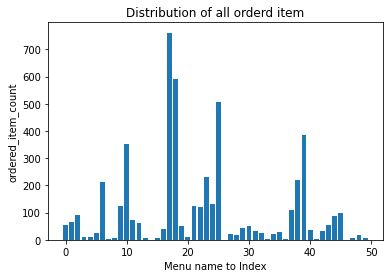

In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.xlabel('Menu name to Index')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')


# bar (x축값, y축값, sort)
# xlabel (x축 이름), ylabel(y축 이름) , title (제목)

In [86]:
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr